**Pre-processing goals:**<br>
In the second part of the project we aimed to familiarize with our dataset and explore its possibilities in order to decide what trends we want to extract out of it. As mentioned before, we first take into account the archives of both the Gazette de Lausanne (GDL) and the Journal de Genève (JDG) during the XXth century. It restricts our dataset to a 100 years for both our journals. Now, we want to study the evolution of environnemental causes interests in the public space. Therefore, we are in a first part going to estimate this evolution and the eventual rises in society awareness on the topics related to these causes. 

**Pre-processing pipeline (Part 1):**<br>
We wanted to set up a basic pipeline in order to get a better view of what our dataset can offer and decide afterwards in which directions we could go on with our work. The below detailed pipeline is exectued for each journal separately.
- First, we extract all the archives from the XXth century of both our journals. Theses archives are xml files. We are therefore going to use the Beautiful Soup html parser to get a sense of what it contains. 
- From our own exploration of the dataset, we saw that all the articles had the following tags coming along: "name" to charaterize the name of the article and "issue_date" to indicate the date when the article was released in the journal. Thus, we are again going to use Beautiful Soup methods. Here, "find_all" will help us retrieve all the content of the previously mentioned tags that matter to our analysis. 
- Once that their content is retrieved we use the text attribute to put the names and issue dates of all articles in two separate lists. Each list is the size of the number of articles archived during the XXth century.
- After that we can verify that the articles and issue dates lists are of same length and it is indeed the case for both journals.

Paths to the data of both journals

In [1]:
DATA_FOLDER_GDL = 'data/GDL/'
DATA_FOLDER_JDG = 'data/JDG/'
PICKLE_DATA_FOLDER = 'pickle_data/'

In [2]:
# imports
import pandas as pd
import numpy as np
import os
from collections import defaultdict
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

Retrieving of all folders of both journals

In [3]:
listing_gdl = os.listdir(DATA_FOLDER_GDL)

listing_jdg = os.listdir(DATA_FOLDER_JDG)

FileNotFoundError: [Errno 2] No such file or directory: 'data/GDL/'

Here, we get rid of the 17th and 18th centuries folders as well as of hidden folders

In [ ]:
prefixes = ('17', '18','.')
for dir_ in listing_gdl[:]:
    if dir_.startswith(prefixes):
        listing_gdl.remove(dir_)
        
for dir_ in listing_jdg[:]:
    if dir_.startswith(prefixes):
        listing_jdg.remove(dir_)

Retrieve articles' titles and issue dates from pickle

In [3]:
gdl_articles_titles_filename = PICKLE_DATA_FOLDER+"gdl_articles_titles"
obj = open(gdl_articles_titles_filename, 'rb')
articles_names_gdl = pickle.load(obj)

In [4]:
jdg_articles_titles_filename = PICKLE_DATA_FOLDER+"jdg_articles_titles"
obj = open(jdg_articles_titles_filename, 'rb')
articles_names_jdg = pickle.load(obj)

In [5]:
gdl_issue_dates_filename = PICKLE_DATA_FOLDER+"gdl_issue_dates"
obj = open(gdl_issue_dates_filename, 'rb')
dates_gdl = pickle.load(obj)

In [6]:
jdg_issue_dates_filename = PICKLE_DATA_FOLDER+"jdg_issue_dates"
obj = open(jdg_issue_dates_filename, 'rb')
dates_jdg = pickle.load(obj)

In [7]:
print('nb of articles (GDL): ', len(articles_names_gdl), '\n', 'nb of articles (JDG): ', len(articles_names_jdg))

nb of articles (GDL):  2184812 
 nb of articles (JDG):  2912098


In [8]:
print('nb of dates (GDL): ', len(dates_gdl), '\n', 'nb of dates (JDG): ', len(dates_jdg))

nb of dates (GDL):  2184812 
 nb of dates (JDG):  2912098


**Pre-processing pipeline (Part 2):**<br>
Now that the first part of our analysis is done we want to learn information about the extracted data. 
- To begin, we are putting each list into a pandas series.
- After that, we want to relate issue dates and the title of their related article. So we create 2 dataframes (one for each journal) with two columns: Issue dates and articles names.
- The format of the issue dates is propice to convert the related column into the datetime format.

And now we are going to proceed with our analysis.

Putting each list into a pandas series

In [9]:
s_articles_gdl = pd.Series( (v for v in articles_names_gdl) )
s_dates_gdl = pd.Series( (v for v in dates_gdl) )

s_articles_jdg = pd.Series( (v for v in articles_names_jdg) )
s_dates_jdg = pd.Series( (v for v in dates_jdg) )

Retrieving dataframes with issue dates and articles names columns from pickle

In [10]:
df_jdg = pd.read_pickle(PICKLE_DATA_FOLDER+'df_jdg')
df_gdl = pd.read_pickle(PICKLE_DATA_FOLDER+'df_gdl')

**Analysis on untitled articles**
- How many over time?
- How many over total?

In [12]:
#jdg 
df_jdg_untitled_articles = df_jdg[df_jdg['Articles Names (JDG)'].str.contains("Untitled Article")]

In [13]:
df_jdg_untitled_articles.head()

,Issue Dates (JDG),Articles Names (JDG)
2,1900-01-01,Untitled Article
4,1900-01-01,Untitled Article
11,1900-01-01,Untitled Article
13,1900-01-01,Untitled Article
14,1900-01-01,Untitled Article


Count # of untitled articles per year

In [14]:
df_jdg_untitled_articles_counts = df_jdg_untitled_articles['Issue Dates (JDG)'].dt.year.value_counts().sort_index()

In [15]:
df_jdg_untitled_articles_counts.head()

1900    11542
1901     9839
1902     9724
1903     9064
1904     9373
Name: Issue Dates (JDG), dtype: int64

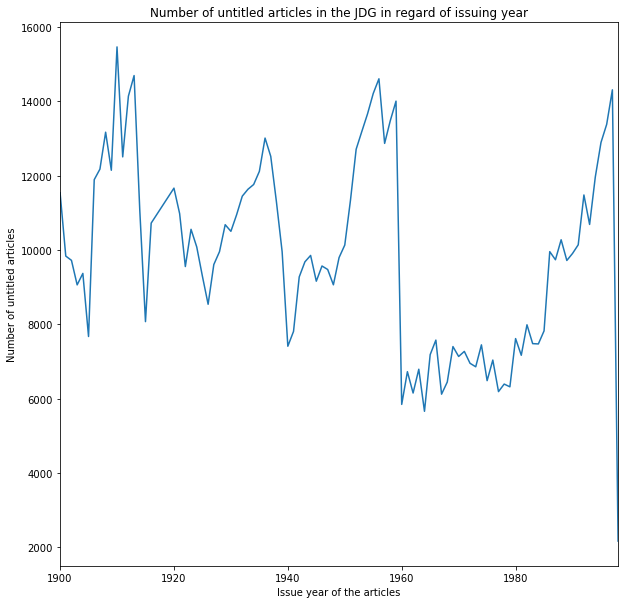

In [16]:
fig = plt.figure(figsize=(10, 10))
df_jdg_untitled_articles_counts.plot()
plt.title('Number of untitled articles in the JDG in regard of issuing year')
plt.xlabel('Issue year of the articles')
plt.ylabel('Number of untitled articles')

Calculate rate of untitled articles over total per issuing year

In [17]:
df_jdg_untitled_articles_rates = df_jdg_untitled_articles_counts / df_jdg['Issue Dates (JDG)'].dt.year.value_counts()

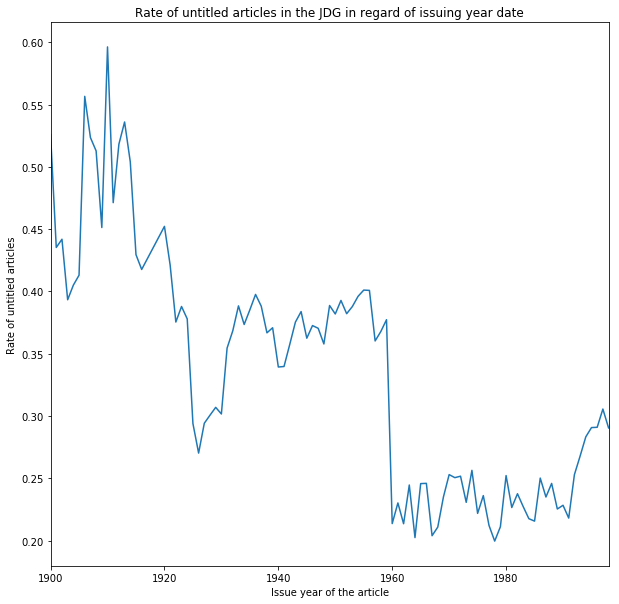

In [18]:
fig = plt.figure(figsize=(10, 10))
df_jdg_untitled_articles_rates.plot()
plt.title('Rate of untitled articles in the JDG in regard of issuing year date')
plt.xlabel('Issue year of the article')
plt.ylabel('Rate of untitled articles')

For the JDG, most of the untitled articles go back to the first decade of the 20th century from 1900 to 1920. The rates decrease consideratly afterwards. 

In [19]:
#gdl
df_gdl_untitled_articles = df_gdl[df_gdl['Articles Names (GDL)'].str.contains("Untitled Article")]

In [20]:
df_gdl_untitled_articles.head()

,Issue Dates (GDL),Articles Names (GDL)
4,1900-01-02,Untitled Article
5,1900-01-02,Untitled Article
6,1900-01-02,Untitled Article
7,1900-01-02,Untitled Article
8,1900-01-02,Untitled Article


Count # of untitled articles per issue year

In [21]:
df_gdl_untitled_articles_counts = df_gdl_untitled_articles['Issue Dates (GDL)'].dt.year.value_counts().sort_index()

In [22]:
df_gdl_untitled_articles_counts.tail()

1994    18396
1995    16215
1996    24441
1997    14596
1998     2170
Name: Issue Dates (GDL), dtype: int64

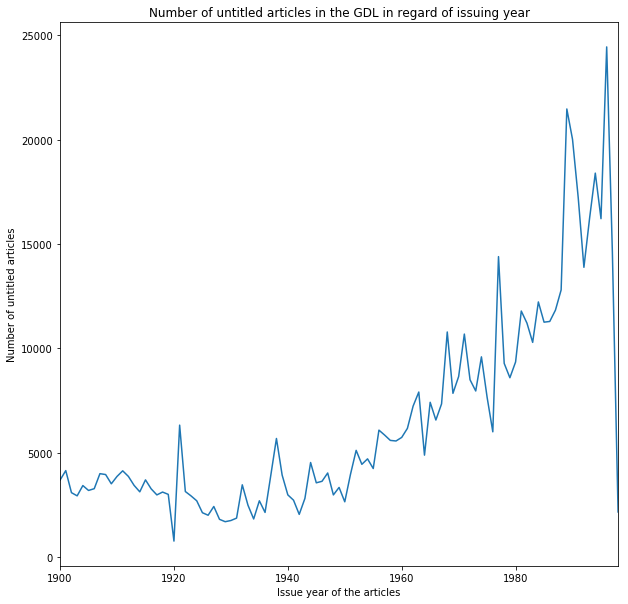

In [23]:
fig = plt.figure(figsize=(10, 10))
df_gdl_untitled_articles_counts.plot()
plt.title('Number of untitled articles in the GDL in regard of issuing year')
plt.xlabel('Issue year of the articles')
plt.ylabel('Number of untitled articles')

Calculate rate of untitled articles over total per issuing year

In [24]:
df_gdl_untitled_articles_rates = df_gdl_untitled_articles_counts / df_gdl['Issue Dates (GDL)'].dt.year.value_counts()

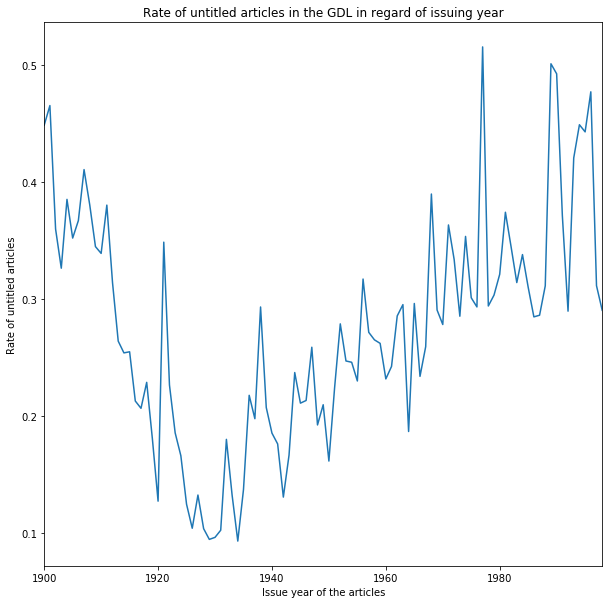

In [25]:
fig = plt.figure(figsize=(10, 10))
df_gdl_untitled_articles_rates.plot()
plt.title('Rate of untitled articles in the GDL in regard of issuing year')
plt.xlabel('Issue year of the articles')
plt.ylabel('Rate of untitled articles')

For the GDL, there is no clear pattern as the rates decrease around 1930 before raising back to an approximative 40% rate as it was for the beginning of the century. 

Remove rows with untitled articles

In [26]:
df_gdl = df_gdl[~df_gdl['Articles Names (GDL)'].str.contains("Untitled Article")]

df_jdg = df_jdg[~df_jdg['Articles Names (JDG)'].str.contains("Untitled Article")]

In [27]:
df_gdl.reset_index(inplace = True, drop = True)

df_jdg.reset_index(inplace = True, drop = True)

In [28]:
df_gdl.head(10)

,Issue Dates (GDL),Articles Names (GDL)
0,1900-01-02,"Lausanne,2janvier1900. Regards en arrière"
1,1900-01-02,LES JUSTES
2,1900-01-02,A propos du colonel Lecomte.
3,1900-01-02,LETTRE DE PARIS
4,1900-01-02,A la Haute Cour.
5,1900-01-02,Une lettre de Mahmoud Pacha
6,1900-01-02,cgifl piocès dramatique.
7,1900-01-02,CONFÉDÉRATION SUISSE
8,1900-01-02,Les conventions de La Haye.
9,1900-01-02,Etrennes politiques.


In [29]:
df_jdg.head(10)

,Issue Dates (JDG),Articles Names (JDG)
0,1900-01-01,1&99
1,1900-01-01,1&99
2,1900-01-01,une fois le cercueil de l'ancien président ren...
3,1900-01-01,En Italie
4,1900-01-01,une fois le cercueil de l'ancien président ren...
5,1900-01-01,Au Vatica n
6,1900-01-01,E n Allemagn e
7,1900-01-01,une fois le cercueil de l'ancien président ren...
8,1900-01-01,E n Autriche
9,1900-01-01,LA SUISSE


**Pre-processing (Part 3):**<br>
- We want to know when the public sphere got interested into the environnement related subjects. Therefore in a very basic manner, we are going to go over all the articles names and see if the terms "environnement" and "écologie" are making frequent apparitions during the XXth century. It will results in the creation of dataframes with only the rows of articles mentioning theses terms.
- We want to get a sense of when these apparitions were and thus we are going to use the value counts method to count the occurence of the terms "environnement" and "écologie" during the XXth century.
- We are also including a merging step to not only see the trends in both journals separetely but to also see their joint occurences.
- Finally, we are going to plot histograms of occurences of the terms in regard of the issuing year of the articles to get a visual rendering of these trends.

In [31]:

dfEcologie_gdl = df_gdl[df_gdl['Articles Names (GDL)'].str.contains("écologie", case = False) == True]

dfEcologie_jdg = df_jdg[df_jdg['Articles Names (JDG)'].str.contains("écologie", case = False) == True]

In [32]:
dfEcologie_gdl.reset_index(inplace = True, drop = True) 
dfEcologie_jdg.reset_index(inplace = True, drop = True)

In [33]:
dfEcologie_gdl.head()

,Issue Dates (GDL),Articles Names (GDL)
0,1954-07-28,Le congrès international de gynécologie et d'o...
1,1965-09-07,Gynécologie
2,1970-01-20,DEMAIN SOIR CONFÉRENCE ACADÉMIQUE SUR L'ÉCOLOGIE
3,1970-01-22,INFORMATIONS SUISSES HIER SOIR A LAUSANNE L'éc...
4,1970-01-23,De la saine écologie Un wellingtonia sauvé à l...


In [34]:
dfEcologie_jdg.head()

,Issue Dates (JDG),Articles Names (JDG)
0,1921-03-20,Institut Humbflldtinniim lllwllllll lIllIlIIJU...
1,1923-08-12,Le Congrès de gynécologie
2,1931-05-13,Société suisse de gynécologie
3,1948-05-31,LA SOCIÉTÉ SUISSE D'OBSTÉTRIQUE ET DE GYNÉCOLO...
4,1951-05-24,Association des DE RETOUR Dr CHARBONNIER F. M....


As you can see this method is not sufficient as it retrieves articles mentioning "gynécologie" which contains the word "écologie". Nevertheless, this method enables a first skimming.

We are now defining a function which ensures that only articles with the word "écologie" in its true form is kept in the dataframe.

In [11]:
import re

def findWholeWord(w):
    return re.compile(r'\b({0})\b'.format(w), flags=re.IGNORECASE).search

In [38]:
drop_indices_gdl = []
for i in range(dfEcologie_gdl['Articles Names (GDL)'].size):
    current_article = dfEcologie_gdl['Articles Names (GDL)'].values[i]
    if findWholeWord('écologie')(current_article) == None:
        drop_indices_gdl.append(i)
dfEcologie_gdl.drop(drop_indices_gdl, inplace = True)

/anaconda/envs/ada/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
drop_indices_jdg = []
for i in range(dfEcologie_jdg['Articles Names (JDG)'].size):
    current_article = dfEcologie_jdg['Articles Names (JDG)'].values[i]
    if findWholeWord('écologie')(current_article) == None:
        drop_indices_jdg.append(i)
dfEcologie_jdg.drop(drop_indices_jdg, inplace = True)

/anaconda/envs/ada/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
dfEcologie_gdl.reset_index(inplace = True, drop = True)
dfEcologie_jdg.reset_index(inplace = True, drop = True)

In [41]:
dfEcologie_gdl.head()

,Issue Dates (GDL),Articles Names (GDL)
0,1970-01-20,DEMAIN SOIR CONFÉRENCE ACADÉMIQUE SUR L'ÉCOLOGIE
1,1970-01-22,INFORMATIONS SUISSES HIER SOIR A LAUSANNE L'éc...
2,1970-01-23,De la saine écologie Un wellingtonia sauvé à l...
3,1970-01-26,INFORMATIONS SUISSES M. Jean Dorst et l'écologie
4,1972-06-29,Université: l'Institut d'écologie animale mis ...


In [42]:
dfEcologie_jdg.head()

,Issue Dates (JDG),Articles Names (JDG)
0,1969-09-23,Technique et nature Connaissez-vous l'écologie ?
1,1969-11-29,ÉCOLOGIE HUMAINE (I) le «bon sauvage»: plus qu...
2,1969-12-01,ÉCOLOGIE HUMAINE (II) Nous n'avons 'plus le te...
3,1969-12-02,ÉCOLOGIE HUMAINE (lU) Pour éviter de grandes c...
4,1970-11-14,1. ÉCOLOGIE: science de l'environnement


As you can see above, only articles titles really mentioning "écologie" are present in the dataframe.

Count occurences of the term "écologie" in the dataframes

In [43]:
dfEcologie_gdl_counts = dfEcologie_gdl['Issue Dates (GDL)'].dt.year.value_counts()

dfEcologie_jdg_counts = dfEcologie_jdg['Issue Dates (JDG)'].dt.year.value_counts()

In [44]:
dfEcologie_gdl_counts = dfEcologie_gdl_counts.sort_index()

dfEcologie_jdg_counts = dfEcologie_jdg_counts.sort_index()

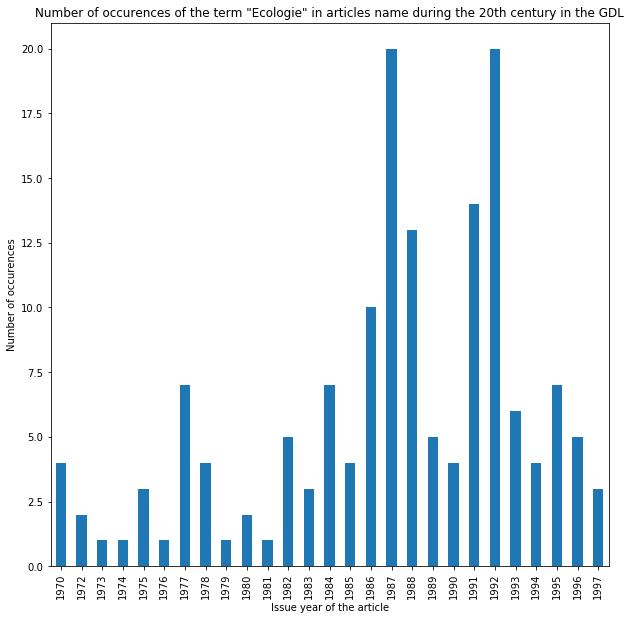

In [45]:
fig = plt.figure(figsize=(10, 10))
dfEcologie_gdl_counts.plot(kind="bar")
plt.title('Number of occurences of the term "Ecologie" in articles name during the 20th century in the GDL')
plt.xlabel('Issue year of the article')
plt.ylabel('Number of occurences')

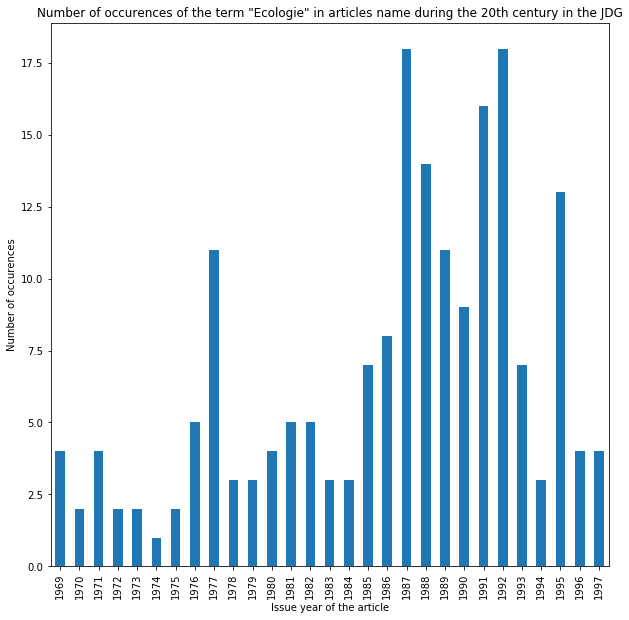

In [46]:
fig = plt.figure(figsize=(10, 10))
dfEcologie_jdg_counts.plot(kind="bar")
plt.title('Number of occurences of the term "Ecologie" in articles name during the 20th century in the JDG')
plt.xlabel('Issue year of the article')
plt.ylabel('Number of occurences')

Merge the GDL and JDG data into one single dataframe

In [47]:
dfEcologie_joint = pd.merge(pd.DataFrame(dfEcologie_gdl_counts), pd.DataFrame(dfEcologie_jdg_counts), left_index = True, right_index = True, how='outer')

Replace non existing values (put by default as NaN) for certain years for one of the journal with 0 values

In [48]:
dfEcologie_joint.fillna(value='0', inplace = True)

In [49]:
dfEcologie_joint.head()

,Issue Dates (GDL),Issue Dates (JDG)
1969,0,4
1970,4,2
1971,0,4
1972,2,2
1973,1,2


Convert the occurences columns to numeric in order to sum them 

In [50]:
dfEcologie_joint['Issue Dates (GDL)'] = pd.to_numeric(dfEcologie_joint['Issue Dates (GDL)'])
dfEcologie_joint['Issue Dates (JDG)'] = pd.to_numeric(dfEcologie_joint['Issue Dates (JDG)'])

In [51]:
dfEcologie_joint = dfEcologie_joint.sum(axis = 1, skipna = False)

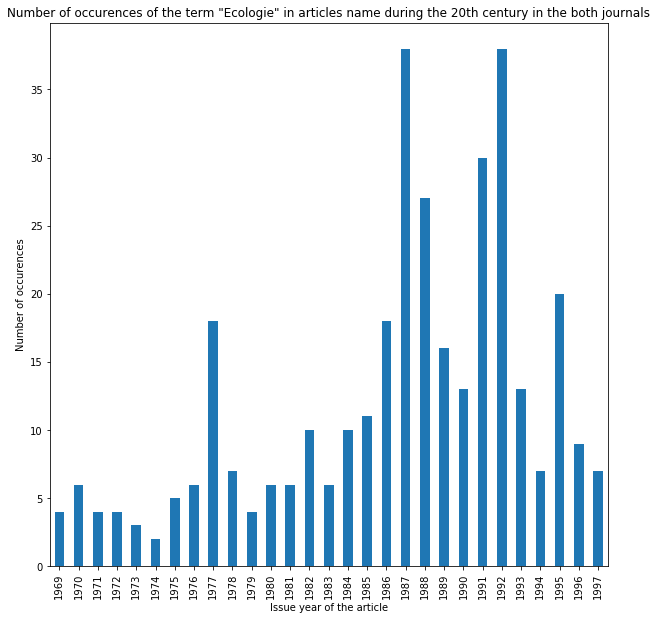

In [52]:
fig = plt.figure(figsize=(10, 10))
dfEcologie_joint.plot(kind="bar")
plt.title('Number of occurences of the term "Ecologie" in articles name during the 20th century in the both journals')
plt.xlabel('Issue year of the article')
plt.ylabel('Number of occurences')

In [53]:
dfEnvironnement_gdl = df_gdl[df_gdl['Articles Names (GDL)'].str.contains("environnement", case = False) == True]

dfEnvironnement_jdg = df_jdg[df_jdg['Articles Names (JDG)'].str.contains("environnement", case = False) == True]

Count occurences of the term "environnement" in the dataframes

In [54]:
dfEnvironnement_gdl_counts = dfEnvironnement_gdl['Issue Dates (GDL)'].dt.year.value_counts()
dfEnvironnement_gdl_counts = dfEnvironnement_gdl_counts.sort_index()

dfEnvironnement_jdg_counts = dfEnvironnement_jdg['Issue Dates (JDG)'].dt.year.value_counts()
dfEnvironnement_jdg_counts = dfEnvironnement_jdg_counts.sort_index()

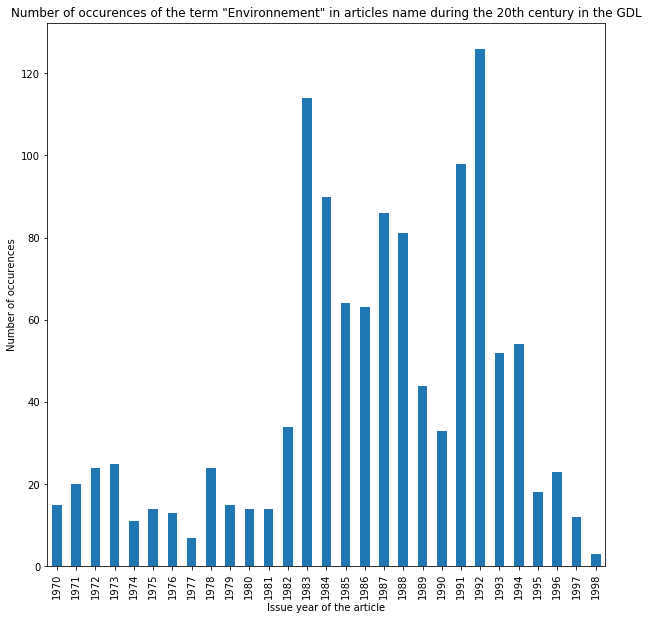

In [55]:
fig = plt.figure(figsize=(10, 10))
dfEnvironnement_gdl_counts.plot(kind="bar")
plt.title('Number of occurences of the term "Environnement" in articles name during the 20th century in the GDL')
plt.xlabel('Issue year of the article')
plt.ylabel('Number of occurences')

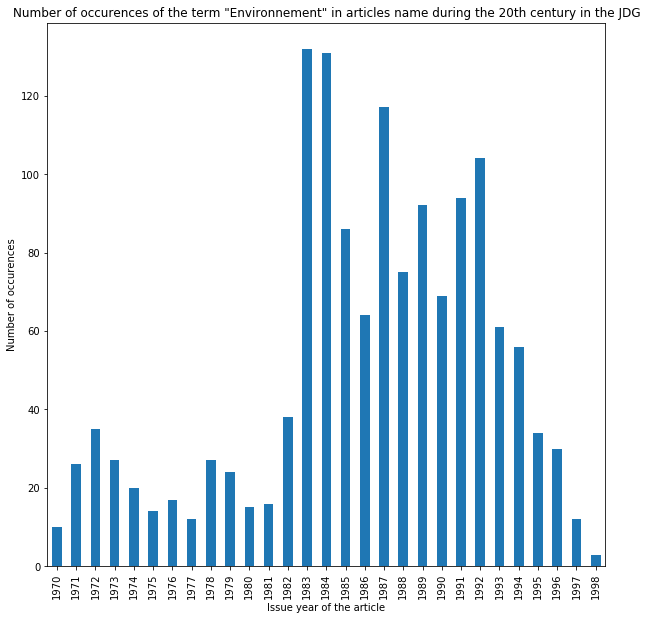

In [56]:
fig = plt.figure(figsize=(10, 10))
dfEnvironnement_jdg_counts.plot(kind="bar")
plt.title('Number of occurences of the term "Environnement" in articles name during the 20th century in the JDG')
plt.xlabel('Issue year of the article')
plt.ylabel('Number of occurences')

Merge the GDL and JDG data into one single dataframe

In [57]:
dfEnvironnement_joint = pd.merge(pd.DataFrame(dfEnvironnement_gdl_counts), pd.DataFrame(dfEnvironnement_jdg_counts), left_index = True, right_index = True, how='outer')

Replace non existing values (put by default as NaN) for certain years for one of the journal with 0 values

In [58]:
dfEnvironnement_joint.fillna(value='0', inplace = True)

Convert the occurences columns to numeric in order to sum them 

In [59]:
dfEnvironnement_joint['Issue Dates (GDL)'] = pd.to_numeric(dfEnvironnement_joint['Issue Dates (GDL)'])
dfEnvironnement_joint['Issue Dates (JDG)'] = pd.to_numeric(dfEnvironnement_joint['Issue Dates (JDG)'])

In [60]:
dfEnvironnement_joint = dfEnvironnement_joint.sum(axis = 1, skipna = False)

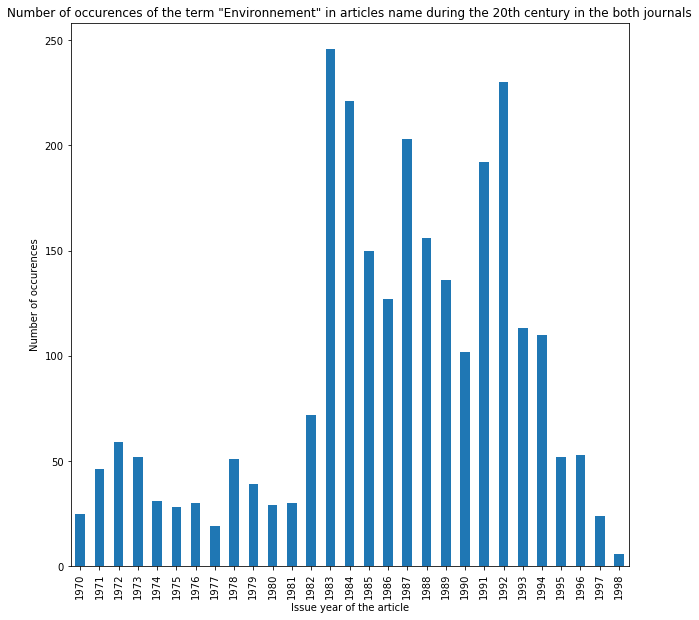

In [61]:
fig = plt.figure(figsize=(10, 10))
dfEnvironnement_joint.plot(kind="bar")
plt.title('Number of occurences of the term "Environnement" in articles name during the 20th century in the both journals')
plt.xlabel('Issue year of the article')
plt.ylabel('Number of occurences')

Let's try now to test if title contains words from a list of terms related to ecology

In [12]:
vocab=pd.read_csv("Mylist.csv",header=None)

In [13]:
vocab = vocab.applymap(str)

In [81]:
def MatchList (x, voc=vocab[0],date='1900-01-01'):
    #date=pd.to_datetime(date)
    if x.equals(df_jdg):
        new=df_jdg[df_jdg['Issue Dates (JDG)']>=date].reset_index()
        Articles=new['Articles Names (JDG)']
        new['flag']=False
        new['match']=np.nan
        #print(new.head())
        
    else:
        new=df_jdl[df_jdl['Issue Dates (JDL)']>=date].reset_index()
        Articles=new['Articles Names (GDL)']
        new['flag']=False
        new['match']=np.nan
        
    for idx in range(0,len(new)):  
        for word in voc:
            
            if findWholeWord(word)(Articles[idx]):
                if x.equals(df_jdg):
                    new['flag'][idx]=True
                    new['match'][idx]=word
                else:
                    new['flag'][idx]=True
                    new['match'][idx]=word
                break

    return new          

In [82]:
test=MatchList(x=df_jdg,date='1998-02-21')

/Users/Hippo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Hippo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Hippo/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [78]:
test[test['flag']==True]

,index,Issue Dates (JDG),Articles Names (JDG),flag,match
145,2911096,1998-02-21,"Climat d'anxiété en Israël, dans l'attente des...",True,climat
240,2911191,1998-02-23,"Dans un climat toujours violent, l'Inde contin...",True,climat
362,2911313,1998-02-24,Pourparlers sur rtflster dans un climat très t...,True,climat
574,2911525,1998-02-26,La qualité de l'environnement: un facteur de s...,True,environnement


**Observations:**<br>
- It is very interesting to see that rises in the mentionning of the terms "environnement" and "écologie" appear at the same time in both journals and it is thereofre accountable in the joint histogram. We clear out two majors peaks around 1987 and 1992 for both terms and both journals. 
- Other than that, we see that before the 1970s approximatively these terms were inexistant in the journals or at least not explicitely mentionned in the articles titles. It can be a hint for our furhter analysis that most of the work can be done with the data from posterior years to that decade.

## What comes next:
This first pre-processing can not by the few terms examined render perfectly and precisely the information from our data. However, the chosen terms are quite general and can be the most probable to be used. So the observations made can give us serious hints on what to do for the pursuit of our analysis.
- One necessary thing to do is to retrieve a set of envrionnemental causes related terms and examine their occurences in the dataset. It will help us determine when the main peaks of information on these related subjects really are.
- After that, we have to know more about what these articles talk about and extract information from it. So one important thing to do is, once we have understood when the important years of publication are, we want to build a new set of data with the articles full content. We are then going to use these wholes articles to understand what the really talk about and especially what is the context that makes the journals talk about environnemental causes. Optionnally, we are going to try and learn the kind of tone they use to treat these topics. Is it done in a scaring manner? Preventing manner? This first objective involves machine learning algorithms which we will use in order to retrieve other subjects treated in these articles as a way to find out more about the context in which they were written. We intent to use the sklearn tools to do some vectorization on the text to extract our features and use algorithms such as a random forest classifier to learn about the correlation between our ecology related data and other topics mentioned in the same articles. 
- We also want to have a visual on this data and this is why we want in parallel to display a map of Switzerland showing in which cantons people care or talk more about sustainable development related topics. This second objective has its cons in the fact that the data we have is related to local cities but we hope that the data does not only restricts its content to these areas of Switzerland. 

We are close to having finished the optimal pre-processing part and we are going to go on with the 2 objectives mentioned above (Machine Learning and map displaying) up to Milestone 3. 